# Labs. Demonstration Notebook

### John Quinn, September 2015

-----
This is a demonstration of an *IPython Notebook*.

The demonstration shows how to use **Numpy, Matplotlib and some Markdown and LaTex formatting**.


---
If you want to run convert this document to LaTex then do **NOT** use *Heading 6* as this causes LaTex to fail. To convert to LaTex use the command:

    ipython notebook --to latex --post pdf demo.ipynb

or use the `File->Download As->PDF` option.

---

##### Example Markdown and LaTex:

["Markdown"](http://daringfireball.net/projects/markdown/) is a text to html tool that allows easy formatting of notebook cells. Within a cell html code and LaTex can be directly embedded. The equation we will use, $y=mx+c$ can also be embedded as $$y=mx+c$$ or
\begin{equation}
y=mx+c
\end{equation}

#### Example code:
```python
    import numpy as np
    x=np.arange(100)
```


#### Example list:
* one
* two
* three

## Example Problem:

The example is to take the data shown in the table below and to plot it, fit a line, and calculate the errors on the fit parameters. The data set to be plotted:

| x   | y   |
|-----|-----|
| 1.0 | 1.8 | 
| 2.0 | 3.8 |
| 3.0 | 4.9 |
| 4.0 | 6.0 |
| 5.0 | 7.4 |

##### First, set up for plotting and load numpy.pyplot:

In [3]:
%matplotlib inline

# matplotlib notebook appears to be buggy

import matplotlib.pyplot as plt

# change default Matplotlib figure settings for the entire document.
# Defaults can also be changed in a configuration file

#plt.rcParams['savefig.dpi'] =100
plt.rcParams['figure.figsize']=(10,6) # make figure 10x6 
plt.rcParams['font.size']=16

##### Now make numpy arrays and plot data

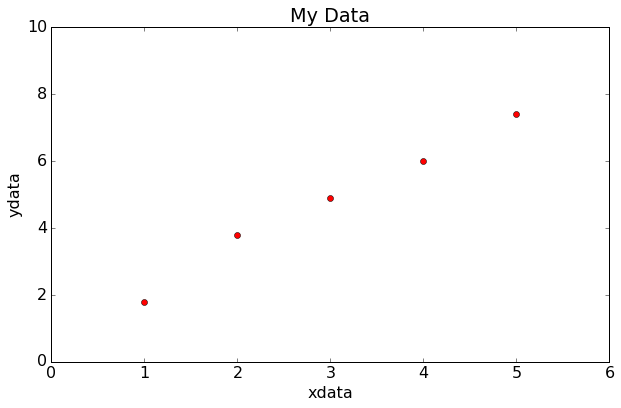

In [4]:
import numpy as np

x=np.array((1, 2, 3, 4, 5))
y=np.array((1.8, 3.8, 4.9, 6, 7.4))


#f=plt.figure(figsize=[8,6])  # Optional command to set figure size

plt.plot(x,y,'ro') # plot with red circles for points. Use 'ro-' to join points with lines.
plt.axis((0,6,0,10)) # optional - if you don't like the default axes limits

plt.xlabel('xdata')
plt.ylabel('ydata')
plt.title('My Data');

##### Fitting the data...

Now fit a straight line of form $y=mx+c$ to the data using `curve_fit()` from `scipy.optimize`

-----

`curve_fit()` usage:

```python
pars, cov = curve_fit(fitfnc,x,y)
```
where `fitfnc` is the function to be fit to the data set `x, y`.
 
`curve_fit()` returns two items - an array and a matrix. The first item, the array, contains the best-fit parameters and the second item is the covariance matrix, from which the errors on the paramters can be estimated. 

In [5]:
from scipy.optimize import curve_fit

# define fit function
def fitfnc(x,m,c):
    return m*x+c

pars, cov = curve_fit(fitfnc,x,y)

# pars contains the fitted parameters...
pars

array([ 1.34,  0.76])

#####  Now plot data again and overlay fitted line...

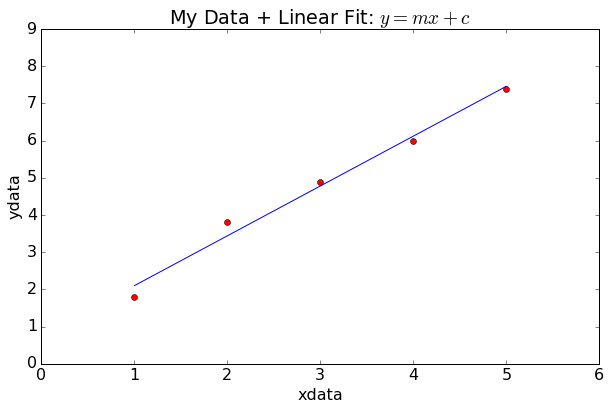

In [6]:
plt.plot(x,y,'ro') 
plt.plot(x,fitfnc(x,*pars),'b-') # blue line
plt.axis((0,6,0,9))

plt.xlabel('xdata')
plt.ylabel('ydata')
plt.title(r'My Data + Linear Fit: $y=mx+c$');